In [2]:
!pip install scikit-image

In [43]:
# Paquetes para trabajar con imágenes
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage import io
import scipy.io as sio

## Compresión de una imagen geométrica

1. Graficar la matriz A en blanco y negro, tomando 1 para blanco y 0 para negro.

In [4]:
A = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])
print(np.shape(A))

(25, 15)


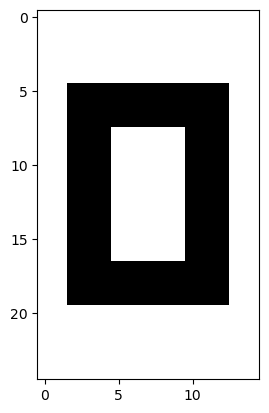

In [5]:
plt.imshow(A, cmap = "gray")

2. ¿Cuántas columnas distintas hay en el dibujo? ¿Cuántas filas distintas hay en $A$?

A partir de esa respuesta: 
- ¿Cuál es el máximo rango posible de $A$?
- ¿Cuántos valores singulares no nulos puede tener como máximo $A$?


3. ¿Cómo podríamos guardar en forma mas compacta esta matriz? (por ejemplo, sin guardar columnas repetidas)

### Valores singulares
Vamos a utilizar valores singulares para automatizar el proceso.

In [6]:
# Calculamos la descomposición en valores singulares
[U, S, Vh] = np.linalg.svd(A)
print("Tamaño de U = ", np.shape(U))
print("Tamaño de S = ", np.shape(S))
print("Tamaño de Vh = ", np.shape(Vh))

Tamaño de U =  (25, 25)
Tamaño de S =  (15,)
Tamaño de Vh =  (15, 15)


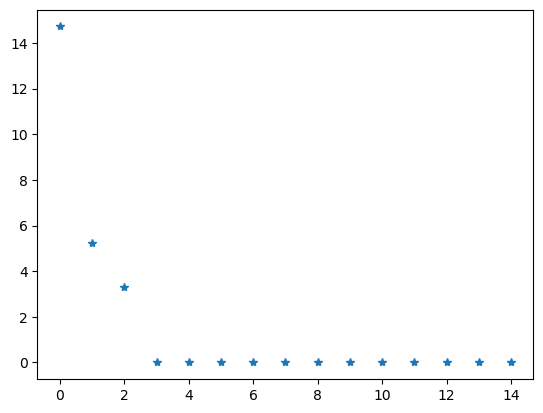

In [7]:
# Graficamos los valores singulares
plt.plot(S, '*')

In [8]:
# Observamos que hay 3 valores singulares no nulos. Lo verificamos.
print(S)

[1.47242531e+01 5.21662293e+00 3.31409370e+00 5.02891414e-16
 1.35739894e-16 8.04126787e-17 1.81199857e-31 1.39717563e-32
 6.64264845e-33 1.82882954e-33 1.46618243e-47 3.19247799e-48
 2.58119687e-49 4.50204515e-64 1.61428292e-64]


4. Para evitar los errores numéricos, definimos una función que elimine de $\Sigma$ los valores singulares pequeños, dejando solo los primeros $k$ valores.

In [9]:
# Función para eliminar de S los valores singulares a partir del k+1
# Toma como parámetro también A para saber el tamaño de Sigma.
def truncateSigma(A, S, k):
    [nRow, nCol] = np.shape(A)
    Sigma = np.zeros((nRow, nCol))
    Sigma[:k, :k] = np.diag(S[:k])
    return(Sigma)

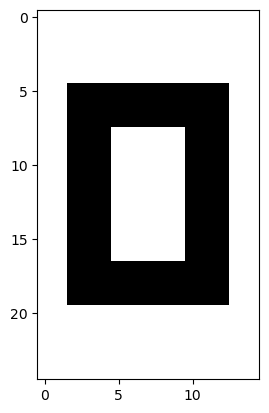

In [10]:
# Aplicamos la función para construir la matriz Sigma con 3 valores singulares no nulos
k = 3
S_trunc = truncateSigma(A, S, 3)
A_3 = U @ S_trunc @ Vh
plt.imshow(A_3, cmap='gray')

### Descomposición SVD reducida. 

Cuando $\Sigma$ tiene solo $k$ valores no nulos en la diagonal, podemos quedarnos con las primeras $k$ columnas de $U$ y las primeras $k$ columnas de $V$ (es decir, las primeras $k$ filas de $V$).

Obtenemos una descomposición que utiliza menos datos
$$
A = \tilde U \tilde \Sigma \tilde V^{*}
$$
con $\tilde U \in \mathbb{K}^{m \times k}$, $\tilde \Sigma \in \mathbb{K}^{k \times k}$, $\tilde V^{*} \in \mathbb{K}^{k \times n}$.

#### Ejercicio.
Demostrarlo, recordando la propiedad para $A$ de $m \times p$ y $B$ de $p \times n$,
$$A B = \sum_{i = 1}^p A_i B_i,$$
donde $A_i$ son las columnas de $A$ y $B_i$ son las filas de $B$.


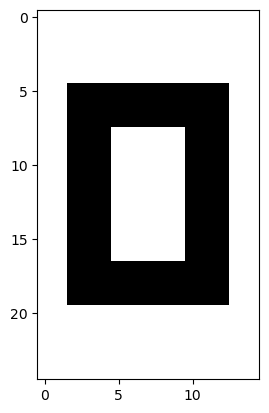

In [11]:
# Podemos construir A utilizando solo las primeras 3 columnas de U y 3 columnas de V (3 filas de Vh)
# y tomando solo la submatriz de 3x3 de S

k = 3
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')

Observación: este método funciona para cualquier matriz de rango 3, no solo para matrices con columnas repetidas.

*Ejercicio:*
¿Cuántos datos se requerían para guardar la matriz original? ¿Cuántos datos se requieren para guardar la descomposición SVD reducida?

## Compresión de la imagen de un árbol

Aplicando la misma estrategia, pero convirtiendo también a 0 los autovalores pequeños obtenemos una forma de comprimir imágenes, perdiendo un poco de calidad en este caso.

(1082, 2000, 3)


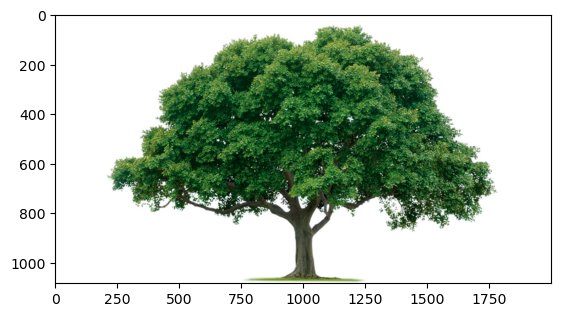

In [12]:
# Leemos el archivo
img = io.imread('tree2.jpg')
print(img.shape)

plt.imshow(img)

(1082, 2000)


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

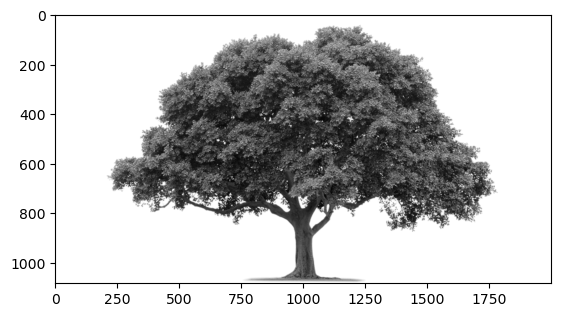

In [15]:
# Lo convertimos a tonos de gris para simplificar la aplicación
imgGray = color.rgb2gray(img)
print(imgGray.shape)

plt.imshow(imgGray, cmap='gray')

# Grabamos la imagen
#plt.savefig('test2.png')

imgGray[:5,:5]

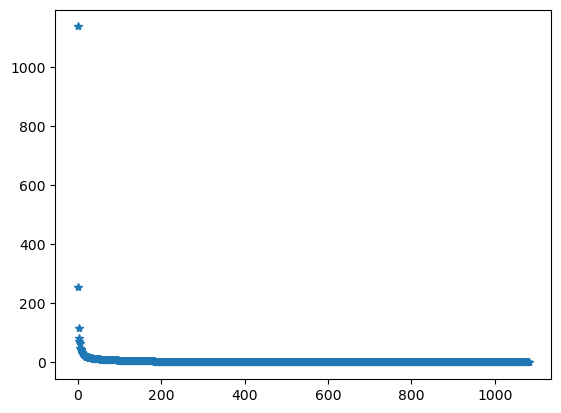

In [16]:
# Calculamos la descomposición SVD de A y graficamos los valores singulares
A = imgGray
[U, S, Vh] = np.linalg.svd(A)
plt.plot(S, '*')

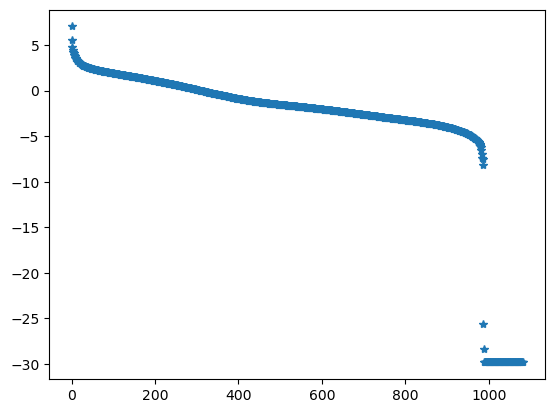

In [17]:
# Graficamos los logaritmos para ver mejor los saltos
plt.plot(np.log(S), '*')
plt.savefig('logS')

In [18]:
# Imprimimos los valores singulares a partir del 900
for i in range(900,1082):
    print(i, np.log(S[i]), S[i])


900 -4.020708469044358 0.017940250324076316
901 -4.039868295362787 0.01759979023697432
902 -4.046576132440216 0.01748212877959284
903 -4.057869756019115 0.017285802899800414
904 -4.062950905717257 0.017198193913292876
905 -4.073513301727073 0.01701749576119815
906 -4.083409780864239 0.01684991307645824
907 -4.0869112975326125 0.016791015999684602
908 -4.092347300641555 0.016699987623933047
909 -4.122400469830994 0.01620556674020655
910 -4.127450197799994 0.01612393930820478
911 -4.143163200366981 0.01587256391158621
912 -4.157418076329355 0.015647907510583623
913 -4.158617449387872 0.01562915108211917
914 -4.186063370948491 0.015206027693609077
915 -4.204448974866032 0.014929010062816012
916 -4.215633210843067 0.014762970733667656
917 -4.219384516448761 0.014707694063461604
918 -4.2332837712142695 0.01450468220175269
919 -4.2631455340191735 0.01407795002004966
920 -4.268600288810868 0.014001367314549415
921 -4.274247564836769 0.013922520572787802
922 -4.290394939178263 0.01369951375411

Vemos que podemos eliminar todos los valores singular a partir de i = 987 sin perder mucha información.


In [20]:
S_trunc = truncateSigma(A, S, 987)       

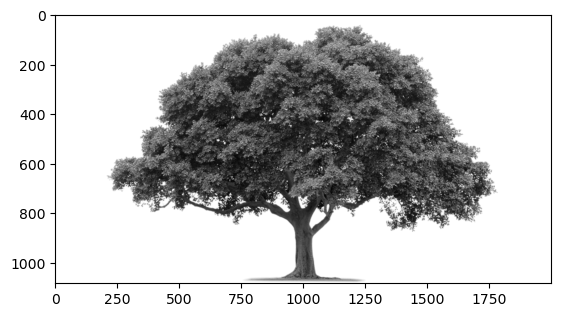

In [21]:
# Reconstruimos la imagen utilizando la nueva S
A_trunc = U @ S_trunc @ Vh
plt.imshow(A_trunc, cmap='gray')

6.952480316291314e-11

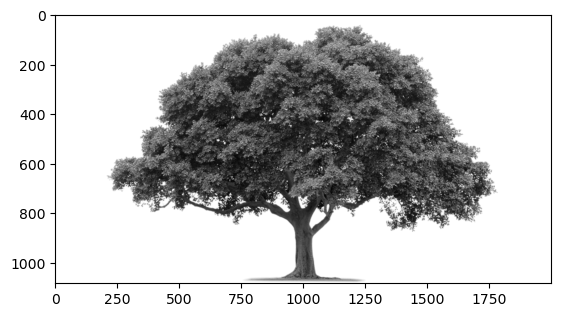

In [22]:
# Comparamos con la version original
plt.imshow(imgGray, cmap='gray')
np.linalg.norm(A_trunc-A)

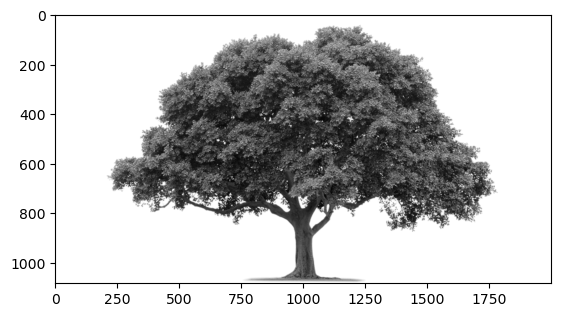

In [23]:
# ¿Cómo guardamos los datos para no guardar información de más?

# Podemos construir A utilizando solo las primeras k columnas de U y k columnas de V (k filas de Vh)
# y tomando solo la submatriz de 987x987 de Sigma

k = 987
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')

In [24]:
# A_zip y A_trunc son exactamente la misma matriz
np.linalg.norm(A_zip-A_trunc)

1.0716018093777138e-13

#### Ejercicio
¿Cuántos datos se requerían para guardar la matriz original? ¿Cuántos datos se requieren para guardar la descomposición SVD reducida? 

¿Hemos realizado una buena compresión de la imagen?

resp:
La original tiene 2164000
Mientras q la truncada tiene 1082x987 + 987 + 987 x 2000 > 3millones... uno parece haber servido por ahora

#### Seguimos reduciendo dimensiones

Distancia entre matrices:  21.14697673701086


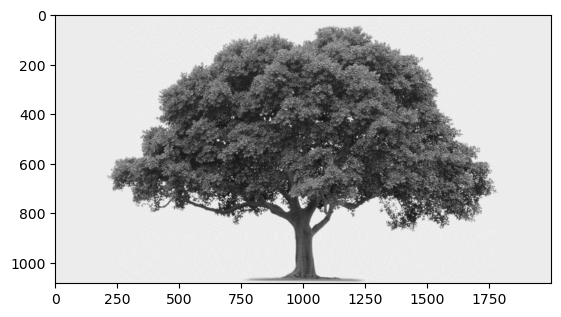

In [36]:
# Probamos eliminar más valores singulares
k = 200
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
plt.imshow(A_zip, cmap='gray')
print("Distancia entre matrices: ", np.linalg.norm(A_zip-A))

#esta tiene 616600....
# se volvio gris pero no se nota en esta compu idk why

In [29]:
# El color blanco se volvió gris...
A_zip[0:5,0:5]

array([[0.99995366, 0.99995366, 0.99995366, 0.99995366, 0.99995366],
       [0.99995366, 0.99995366, 0.99995366, 0.99995366, 0.99995366],
       [0.99995366, 0.99995366, 0.99995366, 0.99995366, 0.99995366],
       [0.99995366, 0.99995366, 0.99995366, 0.99995366, 0.99995366],
       [0.99995366, 0.99995366, 0.99995366, 0.99995366, 0.99995366]])

In [32]:
# Comprobamos si nos mantenemos en el rango [0, 1]
print("min = ", np.min(A_zip))
print("max = ", np.max(A_zip))

min =  -0.05719658404312532
max =  1.0856857172437213


La función imshow con `cmap = gray` toma el mínimo de los valores como negro y el máximo como blanco. Pero nosotros queremos que siga utilizando la misma escala de colores que antes. Forzamos a que todos los valores estén entre 0 y 1. Es decir tomamos todos los negativos como negro, y los mayores que 1 como blanco.

In [33]:
# Convertimos los valores mayores que 1 a 1 y los menores que 0 a 0.
A_zip = np.minimum(np.ones(A.shape), A_zip)
A_zip = np.maximum(np.zeros(A.shape), A_zip)

#### Graficamos
plt.imshow(A_zip, cmap='gray')

In [37]:
# Calculamos la cantidad de datos en este caso. 
k = 200
[nr, nc] = A.shape
cant = k * nr + k * nc + k   # Datos en U, V y S respectivamente
print("Cantidad de datos originales: ", nr * nc)
print("Cantidad de datos en la imagen comprimida: ", cant)
print("Porcentaje de compresión: ", cant / (nr*nc) * 100)

Cantidad de datos originales:  2164000
Cantidad de datos en la imagen comprimida:  616600
Porcentaje de compresión:  28.493530499075785


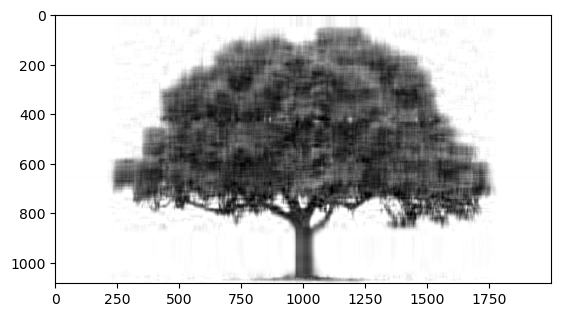

In [41]:
# Probamos eliminar más valores singulares
k = 20
A_zip = U[:,:k] @ S_trunc[:k,:k] @ Vh[:k,]
A_zip = np.minimum(np.ones(A.shape), A_zip)
A_zip = np.maximum(np.zeros(A.shape), A_zip)
plt.imshow(A_zip, cmap='gray')

In [39]:
# Calculamos la cantidad de datos en este caso. 
k = 20
[nr, nc] = A.shape
cant = k * nr + k * nc + k   # Datos en U, V y S respectivamente
print("Cantidad de datos originales: ", nr * nc)
print("Cantidad de datos en la imagen comprimida: ", cant)
print("Porcentaje de compresión: ", cant / (nr*nc) * 100)

Cantidad de datos originales:  2164000
Cantidad de datos en la imagen comprimida:  61660
Porcentaje de compresión:  2.8493530499075788


#### Ejercicio

Repetir estos pasos para el ejemplo `quijote.jpg` de la práctica, y resolver los ejercicios 9 a 13.

In [46]:
mat = sio.loadmat('matlab/base_40_38_10.mat')
# data es una matriz de 1444 x 380.
# Corresponde a figuras de caras de tamanio 38x38 pixeles
data = mat['data']
label = mat['label']
# extraemos la dimensionalidad de data, donde n es la cantidad de ejemplos, y d la dimensión del espacio.
d, n = data.shape

In [51]:
def showPic(data, idx, dx=38):
    # graficamos una rotro
    v = data[:,idx] # primera columna
    m = v.reshape((dx,dx)).T
    return m
    #plt.imshow(m, cmap=plt.cm.gray)


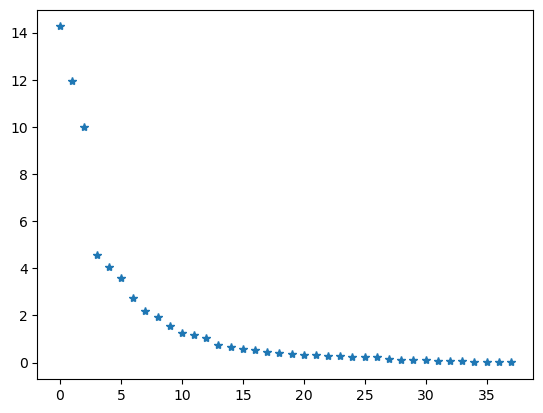

In [52]:
cara1=showPic(data,0)

# Calculamos la descomposición SVD de A y graficamos los valores singulares
[U, S, Vh] = np.linalg.svd(cara1)
plt.plot(S, '*')

0 2.6573443424279244 14.25837341809565
1 2.479849334943898 11.939465422101962
2 2.3002674593704406 9.976850500155702
3 1.521385169252709 4.578562889275113
4 1.4023877208255737 4.064894221238179
5 1.2778954141005574 3.5890782479980037
6 1.014644295157996 2.758382052999806
7 0.7766064311628327 2.1740818362565832
8 0.6515894805451726 1.9185879649351942
9 0.42652663434271954 1.5319273282769352
10 0.21772135420077676 1.2432405955804324
11 0.16398559604773028 1.1781973442721878
12 0.026031941518705717 1.0263737318856194
13 -0.29946516575075277 0.7412145416121613
14 -0.3911754958311357 0.6762614645568762
15 -0.5857357778257817 0.5566961064353854
16 -0.6395809607372034 0.5275134265728325
17 -0.8167371445878172 0.4418710663329107
18 -0.9233617281236234 0.3971815777699004
19 -1.0412922430527785 0.35299822759005944
20 -1.1468230257295642 0.31764431587564806
21 -1.186699549378304 0.3052269900884175
22 -1.2814748952517898 0.2776275268198106
23 -1.3306989183465692 0.2642924778714373
24 -1.4051361298

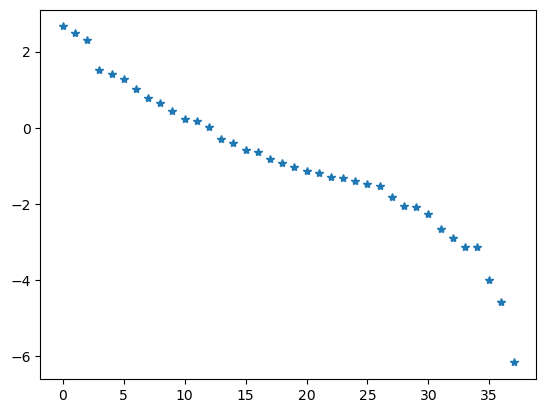

In [55]:
# Imprimimos los valores singulares a partir del 900
for i in range(0,35):
    print(i, np.log(S[i]), S[i])
# Graficamos los logaritmos para ver mejor los saltos
plt.plot(np.log(S), '*')
plt.savefig('logS')

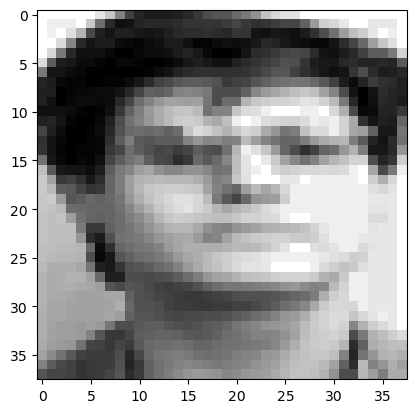

In [60]:
S_trunc = truncateSigma(cara1, S, 34)      
# Reconstruimos la imagen utilizando la nueva S
A_trunc = U @ S_trunc @ Vh
plt.imshow(A_trunc, cmap='gray')

0.04826687122724942

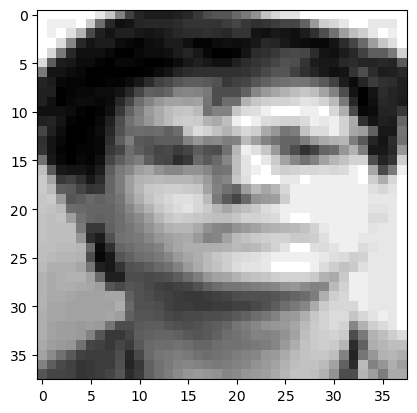

In [63]:
# Comparamos con la version original
plt.imshow(cara1, cmap='gray')
np.linalg.norm(A_trunc-cara1)